# Intermezzo - Piece-wise linear
2021 07 31 Maarten Pennings

When modeling the sinus function, it seemed that the simpel model bheaved like a piece-wise linear approximation. I was wondering if that simple two layer model could indeed implement a piece-wise linear curve. The answer is yes as I will show in this intermezzo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x) : return np.where(x<0, 0.0, x)

## First line segment

Let us assume we have a first line (segment) k0, running from A at (3,1) to B at (6,7).

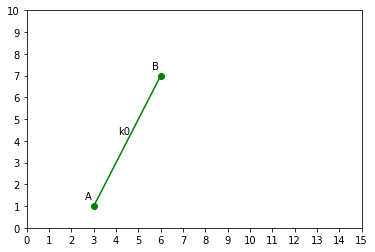

In [2]:
# Define the coordinates of the two points A and B
A = { "x":3 ,"y":1 }
B = { "x":6, "y":7 }

# Define the line k0 from point A to point B
def k0(x) : 
    slope = (B["y"] - A["y"]) / ( B["x"] - A["x"] )
    offset = A["y"]
    return slope * (x - A["x"]) + offset

# Setup a array of values to draw k0 (the two end-points suffice)
k0_xs = [ A["x"], B["x"] ]
k0_ys = [ k0(x) for x in k0_xs ]

# Ensure plot is big enough, and has all unit ticks
plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))
# Label the start (A) and end point (B), and the line (k0)
plt.text( A["x"]-0.4, A["y"]+0.3, "A")
plt.text( B["x"]-0.4, B["y"]+0.3, "B")
plt.text( (B["x"]+A["x"])/2-0.4, (B["y"]+A["y"])/2+0.3, "k0")
# Plot in green (g), using lines (-) between dot markers (o)
plt.plot( k0_xs, k0_ys, 'g-o');

Our next job is to implement this line (segment) k0 with two neurons. We take the same neurons as in our model: first layer with relu, second without.

$$
  v_0 \rightarrow relu(w_1\cdot v_0+b_1) \rightarrow v_1 \rightarrow w_2\cdot v_1+b_2 \rightarrow v_2
$$
  
We use the first neuron to start at $A_x$ by setting $w_1=1$ and $b_1=-A_x$. 

$$
  v_0 \rightarrow relu(1\cdot v_0-A_x) \rightarrow v_1 
$$
  
The $relu$ "discards" (keeps at 0) every input below $A_x$. Above $A_x$ it is the identity, i.e. it returns $x-A_x$.

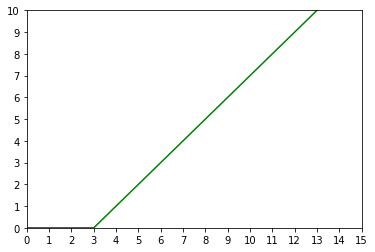

In [3]:
def k0_v0_v1(x) :
    return relu( 1 * x - A["x"] )
    
k0_xs = [ -5, A["x"], 20 ]
k0_ys = [ k0_v0_v1(x) for x in k0_xs ]

plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))
plt.plot( k0_xs, k0_ys, 'g-');

The second neuron 

$$
  v_1 \rightarrow w_2\cdot v_1+b_2 \rightarrow v_2 
$$

implements the slope and offset of line (segment) k0.

So, the slope is $w_2 = (B_y-A_y)/(B_x-A_x)$ and the offset is $b_2 = A_y$

$$
  v_1 \rightarrow \frac{7-1}{6-3}\cdot v_1 + 1 \rightarrow v_2 
$$




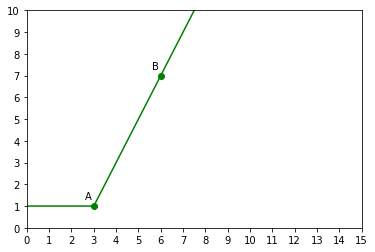

In [4]:
def k0_v1_v2(x) :
    slope = (B["y"] - A["y"]) / ( B["x"] - A["x"] )
    offset = A["y"]
    return slope * x + offset
    
k0_xs = [ -5, A["x"], B["x"], 20 ]
k0_ys = [ k0_v1_v2(k0_v0_v1(x)) for x in k0_xs ]

plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))

plt.plot( k0_xs, k0_ys, 'g-o');
plt.text( A["x"]-0.4, A["y"]+0.3, "A")
plt.text( B["x"]-0.4, B["y"]+0.3, "B");

## Second line segment

We see that with two consecutive neurons (first with relu) we can implement one line segment. 

Let us now add a second line (segment) k1, running from B at (6,7) to C at (10,9).

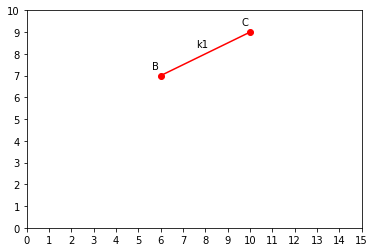

In [5]:
# Define the coordinates of the next point C
C = { "x":10, "y":9 }

# Define the line k1 from point B to point C
def k1(x) : 
    slope = (C["y"] - B["y"]) / ( C["x"] - B["x"] )
    offset = B["y"]
    return slope * (x - B["x"]) + offset

# Setup a array of values to draw k1 (the two end-point suffice)
k1_xs = [ B["x"], C["x"] ]
k1_ys = [ k1(x) for x in k1_xs ]

# Ensure plot is big enough, and has all unit ticks
plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))
# Label the start (B) and end point (C), and the line (k1)
plt.text( B["x"]-0.4, B["y"]+0.3, "B")
plt.text( C["x"]-0.4, C["y"]+0.3, "C")
plt.text( (C["x"]+B["x"])/2-0.4, (C["y"]+B["y"])/2+0.3, "k1")
# Plot in red (r), using lines (-) between dot markers (o)
plt.plot( k1_xs, k1_ys, 'r-o');

In the same way as for the first segment, we define the two neurons.

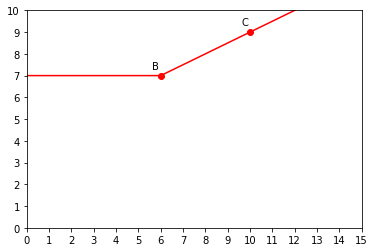

In [6]:
def k1_v0_v1(x) :
    return relu( 1 * x - B["x"] )

def k1_v1_v2(x) :
    slope = (C["y"] - B["y"]) / ( C["x"] - B["x"] )
    offset = B["y"]
    return slope * x + offset
    
k1_xs = [ -5, B["x"], C["x"], 20 ]
k1_ys = [ k1_v1_v2(k1_v0_v1(x)) for x in k1_xs ]

plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))

plt.plot( k1_xs, k1_ys, 'r-o');
plt.text( B["x"]-0.4, B["y"]+0.3, "B")
plt.text( C["x"]-0.4, C["y"]+0.3, "C");

## Third line segment

To check the genericity of our piece-wise linear model, we even add a third line (segment) k2, 
running from C at (10,9) to D at (13,6).

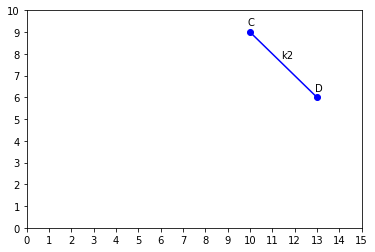

In [7]:
# Define the coordinates of the next point D
D = { "x":13, "y":6 }

# Define the line k2 from point C to point D
def k2(x) : 
    slope = (D["y"] - C["y"]) / ( D["x"] - C["x"] )
    offset = C["y"]
    return slope * (x - C["x"]) + offset

# Setup a array of values to draw k2 (the two end-point suffice)
k2_xs = [ C["x"], D["x"] ]
k2_ys = [ k2(x) for x in k2_xs ]

# Ensure plot is big enough, and has all unit ticks
plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))
# Label the start (C) and end point (D), and the line (k2)
plt.text( C["x"]-0.1, C["y"]+0.3, "C")
plt.text( D["x"]-0.1, D["y"]+0.3, "D")
plt.text( (D["x"]+C["x"])/2-0.1, (D["y"]+C["y"])/2+0.3, "k2")
# Plot in blue (b), using lines (-) between dot markers (o)
plt.plot( k2_xs, k2_ys,'b-o');

In the same way as for the first two segments, we define the two neurons.

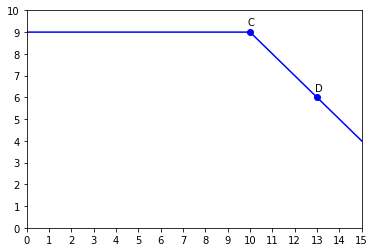

In [8]:
def k2_v0_v1(x) :
    return relu( 1 * x - C["x"] )

def k2_v1_v2(x) :
    slope = (D["y"] - C["y"]) / ( D["x"] - C["x"] )
    offset = C["y"]
    return slope * x + offset
    
k2_xs = [ -5, C["x"], D["x"], 20 ]
k2_ys = [ k2_v1_v2(k2_v0_v1(x)) for x in k2_xs ]

plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))

plt.plot( k2_xs, k2_ys, 'b-o');
plt.text( C["x"]-0.1, C["y"]+0.3, "C")
plt.text( D["x"]-0.1, D["y"]+0.3, "D");

## Combining the three line segments

Can we now combine the three line segments into one piece-wise linear curve:
a line segment from knee point A to knee point B (green),
a line segment from knee point B to knee point C (red), and
a line segment from knee point C to knee point D (blue)?

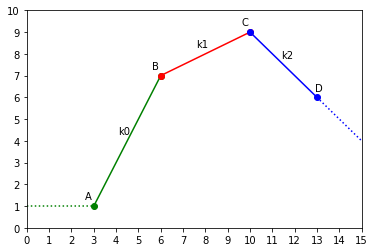

In [9]:
# Setup arrays to draw the segments
pre_xs = [ -5, A["x"] ]
pre_ys = [  A["y"],  A["y"] ]

k0_xs  = [ A["x"], B["x"] ]
k0_ys  = [ k0(x) for x in k0_xs ]

k1_xs  = [ B["x"], C["x"] ]
k1_ys  = [ k1(x) for x in k1_xs ]

k2_xs  = [ C["x"], D["x"] ]
k2_ys  = [ k2(x) for x in k2_xs ]

post_xs= [ D["x"], 20 ]
post_ys= [ k2(x) for x in post_xs ]


# Ensure plot is big enough, and has all unit ticks
plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))
# Label the knee points (A, B and C), and the lines (k0,k1)
plt.text( A["x"]-0.4, A["y"]+0.3, "A")
plt.text( B["x"]-0.4, B["y"]+0.3, "B")
plt.text( C["x"]-0.4, C["y"]+0.3, "C")
plt.text( D["x"]-0.1, D["y"]+0.3, "D")
plt.text( (B["x"]+A["x"])/2-0.4, (B["y"]+A["y"])/2+0.3, "k0")
plt.text( (C["x"]+B["x"])/2-0.4, (C["y"]+B["y"])/2+0.3, "k1")
plt.text( (D["x"]+C["x"])/2-0.1, (D["y"]+C["y"])/2+0.3, "k2")

# Plot in green/red (g/r), using lines (-) between dot markers (o)
plt.plot( k0_xs, k0_ys, 'g-o')
plt.plot( k1_xs, k1_ys, 'r-o')
plt.plot( k2_xs, k2_ys, 'b-o');
# Plot the pre and post segments
plt.plot( pre_xs , pre_ys , 'g:')
plt.plot( post_xs, post_ys, 'b:')


The above graph shows what we want. For the green segment we have one neuron pair, for the red segment we have one neuron pair and for the blue segment we have one. However, we want to combine that to one network:

![model](piecewise-linear.png)

Let us do case analysis on the input value.

- Input values less than $A_x$.
   - The intermediate layer values ($value_{1,0}$, $value_{1,1}$1 and  $value_{1,2}$) are zero.
   - The weights ($weight_{2,0}$, $weight_{2,1}$, and  $weight_{2,2}$) are thus irrelevant for this input range.
   - We will set $bias_2$ to $A_y$, to have a flat-line start, just as we had with the single line segments.

- Input values between $A_x$ and $B_x$.
   - The first intermediate layer value ($value_{1,0}$) is the x for line k0, starting a 0.
   - We will set $weight_{2,0}$ to the slope of k0.
   - The other intermediate layer values ($value_{1,1}$ and $value_{1,1}$) are still 0.
   - Their weights ($weight_{2,1}$ and $weight_{2,2}$) are thus irrelevant for this input range.

- Input values between $B_x$ and $C_x$.
   - The second intermediate layer value ($value_{1,1}$) is the x for line k1, starting a 0.
   - However, $value_{1,0}$ is the x for line k0, so starting from $B$ we get the slope from k0 for "free".
   - We will set $weight_{2,1}$ to the slope of k1 minus the slope of k0.
   - The third intermediate layer value ($value_{1,2}$) is still 0.
   - Its weight ($weight_{2,2}$) is thus irrelevant for this input range.
   
- Input values between $C_x$ and $D_x$.

- The third intermediate layer value ($value_{1,2}$) is the x for line k2, starting a 0.
   - However, we get the previous slopes for "free".
   - We will set $weight_{2,2}$ to the slope of k2 minus the slope of k1 (which is corrected for the slope of k0).
   
This analysis leads to the following network.

In [10]:
# Layer 1
def neuron_1_0(v_0) :
    weight_1_0 = 1
    bias_1_0   = -A["x"]
    return relu( weight_1_0 * v_0 +bias_1_0 )

def neuron_1_1(v_0) :
    weight_1_1 = 1
    bias_1_1   = -B["x"]
    return relu( weight_1_1 * v_0 +bias_1_1 )

def neuron_1_2(v_0) :
    weight_1_2 = 1
    bias_1_2   = -C["x"]
    return relu( weight_1_2 * v_0 +bias_1_2 )

# layer 2
slope0 = (B["y"] - A["y"]) / ( B["x"] - A["x"] )
slope1 = (C["y"] - B["y"]) / ( C["x"] - B["x"] )
slope2 = (D["y"] - C["y"]) / ( D["x"] - C["x"] )

def neuron_2(v_1_0,v_1_1,v_1_2) :
    weight_2_0 = slope0
    weight_2_1 = slope1 - slope0
    weight_2_2 = slope2 - slope1
    bias_2     = A["y"]
    return weight_2_0 * v_1_0 + weight_2_1 * v_1_1 + weight_2_2 * v_1_2 + bias_2

# Network
def network(v_0) :
    v_1_0 = neuron_1_0(v_0)
    v_1_1 = neuron_1_1(v_0)
    v_1_2 = neuron_1_2(v_0)
    v_2   = neuron_2(v_1_0,v_1_1,v_1_2)
    return v_2

Let's now plot its graph

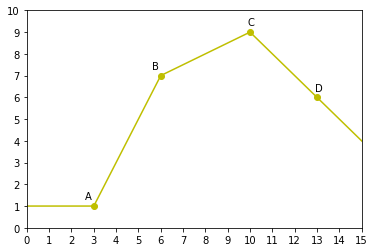

In [11]:
xs = [ -5, A["x"], B["x"], C["x"], D["x"], 20 ]
ys = [ network(x) for x in xs ]

plt.xlim( (0,15) )
plt.ylim( (0,10) )
plt.xticks(np.arange(0, 15+1, step=1))
plt.yticks(np.arange(0, 10+1, step=1))

plt.text( A["x"]-0.4, A["y"]+0.3, "A")
plt.text( B["x"]-0.4, B["y"]+0.3, "B")
plt.text( C["x"]-0.1, C["y"]+0.3, "C")
plt.text( D["x"]-0.1, D["y"]+0.3, "D")

plt.plot( xs, ys, 'y-o');

## Concluding the intermezzo

This was an unexpectedly long intermezzo.

We succeeded in configuring a neural network to represent a piece-wise linear curve.

The neural network has two layers. The first one is dense, with relu, creating a hidden layer with _n_ nodes.
The second one, also dense, no relu, single output.
Such a network can represent an piece-wise linear curve consting of _n_ pieces.

There is also an [excel model](piecewise-linear.xlsx).
